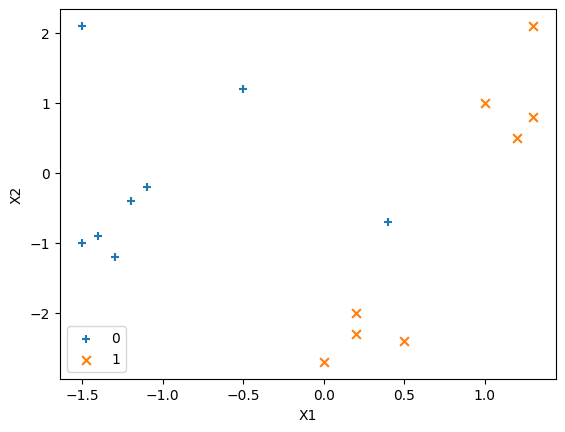

In [1]:
# Importación de librerías

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se define un dataset a partir de puntos

X = np.c_[(.4, -.7),(-1.5, -1),(-1.4, -.9),(-1.3, -1.2),(-1.1, -.2),(-1.2, -.4),(-.5, 1.2),(-1.5, 2.1),
          (1, 1),(1.3, .8),(1.2, .5),(.2, -2),(.5, -2.4),(.2, -2.3),(0, -2.7),(1.3, 2.1)].T
y = [0] * 8 + [1] * 8

# Se representan los puntos generados

plt.scatter(X[:8][:,0], X[:8][:,1], s=40, label="0", marker="+")
plt.scatter(X[8:][:,0], X[8:][:,1], s=40, label="1", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

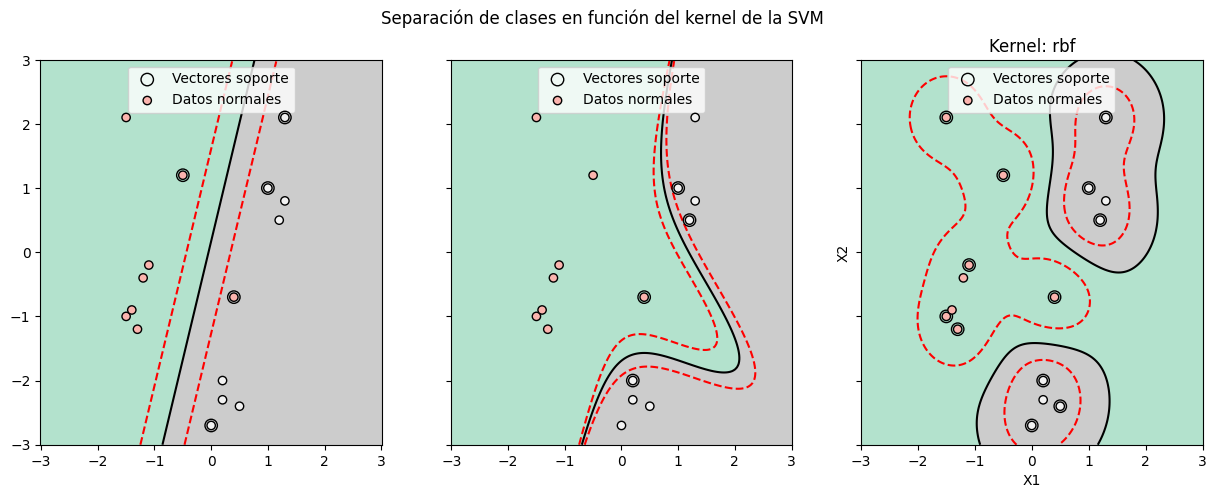

In [2]:
# Se ajusta SVM a los datos probando distintos tipos de kernel

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)
for ix, kernel in enumerate(['linear', 'poly', 'rbf']):
    
# Se ajusta el modelo con el kernel seleccionado a los datos

    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, y)

# Se representan los vectores soporte

    axes[ix].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
                     s=80,facecolors='none', zorder=10, edgecolors='k', label='Vectores soporte')

# Se representan los datos

    axes[ix].scatter(X[:, 0], X[:, 1], c=y, zorder=10, 
                     cmap=plt.cm.Pastel1, edgecolors='k', label='Datos normales')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Se representan las fronteras de decisión

    Z = Z.reshape(XX.shape)
    axes[ix].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Pastel2)
    axes[ix].contour(XX, YY, Z, colors=['r', 'k', 'r'], 
                     linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    axes[ix].legend(loc='upper center')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
axes[ix].set_xlabel("X1")
axes[ix].set_ylabel("X2")
axes[ix].set_title('Kernel: {}'.format(kernel))
fig.suptitle(u'Separación de clases en función del kernel de la SVM')
plt.show()